<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 6</center></b><h2>
<h3><b><center>Péndulo Doble</center></b><h3>
<h5><center><b>Asignada</b>: 9 de Mayo de 2024</center><h5>
<h5><center><b>Entrega</b>: 24 de Mayo de 2024</center><h5>

<hr/>
<b>Nombre</b>: Mariana Gómez Cuartas
<br/>
<b>Cédula</b>: 1001011072
<br/>
<b>Última actualización</b>: 28 de mayo, 2024
<hr/>

## Enunciado

**Objetivo**: Estudiar la dinámica del péndulo doble utilizando los métodos de Lagrange y Hamilton.

Un péndulo doble es un sistema formado por 2 partículas puntuales de masas $m_1$ y $m_2$ unidas por varillas inextensibles de longitudes $L_1$ y $L_2$. La varilla $L_1$ esta fija a un punto del espacio.

**Procedimiento**:

1. Para este sistema identifique:

  - Número de partículas: _____________
  - Número de coordenadas: _____________
  - Número de restricciones: _____________
  - Número de grados de libertad: _____________

  Identifique las variables generalizadas del sistema y explique por qué esas variables son apropiadas para describir el sistema con el método de Lagrange.

2. Escriba las ecuaciones que permiten transformar de las variables generalizadas $\{q_j\}_M$ a las coordenadas $\{\vec r_i\}_N$ y viceversa (transformación inversa).

3. Usando `SymPy` escriba una rutina que, dadas las ecuaciones de transformación  $\{\vec r_i(\{q_j\}_M)\}_N$ calcule la función de energía cinética para el sistema y sus derivadas.

4. Usando `SymPy`, determine la fórmula para las fuerzas generalizadas.

5. Usando los resultados en 3 y en 4, escriba las ecuaciones de movimiento del sistema a partir de las ecuaciones de Lagrange del Sistema. Es normal que las ecuaciones se escriban como la segunda derivada de cada variable generalizada como función de las primeras derivada de las variables generalizadas y las variables generalizadas en sí.  Es decir las ecuaciones deben tener la forma:

  $$
  \ddot q_j = f_j (\{q_j\}_M,\{\dot q_j\}_M,t)
  $$

6. Programe las ecuaciones de movimiento e intégrelas numéricamente para condiciones iniciales apropiadas. Haga una animación de la solución.

**Resultados esperados**:

- Este notebook con el procedimiento matemáticos y numéricos debidamente comentados en celdas de texto y de código.

- Gráficos mínimos:
  - Animación del movimiento del sistema.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

In [40]:
!pip install -Uq pymcel celluloid

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import pymcel as pc
from scipy.integrate import odeint
from celluloid import Camera
from IPython.display import HTML

#1.
 Para este sistema identifique:

  - Número de partículas(N): 2

  - Número de coordenadas: 3N = 6

  Son 3 coordenadas asociadas a cada partícula

  - Número de restricciones: 4

  Dos restricciones asociados con la inextensibilidad de las dos cuerdas presentes en el problema.

  Dos restricciones asociadas con que los péndulos no se pueden salir del plano $xy$

  - Número de grados de libertad: 2

  Es la resta entre el numero de coordenadas y el número de restricciones.


  Identifique las variables generalizadas del sistema y explique por qué esas variables son apropiadas para describir el sistema con el método de Lagrange.

Las variables generalizadas asociadas al problema del péndulo doble son:

- $q_1 = \theta_1$
- $q_2 = \theta_2$

Se escogen estas y no otras, debido a que además de ser variables independientes, la intuición asociada con el problema físico del péndulo nos indica que la ecuación de movimiento se encuentra de una forma más sencilla cuando trabajamos en coordenadas polares (donde hay presencia de componentes angulares)

En el siguiente diagrama se muestran las componentes asociadas al problema.

<center><img src="https://drive.google.com/uc?id=1ZTzNDvTBlFVYkoqaVeWDOAtC2_G0Nlmb" align="center" width="550"></center>

#2.
 Escriba las ecuaciones que permiten transformar de las variables generalizadas $\{q_j\}_M$ a las coordenadas $\{\vec r_i\}_N$ y viceversa (transformación inversa).

La notación que vamos a usar es el acompañante 1 asociado a la primera masa, y el acompañante 2 asociado a la segunda masa.

Comenzamos mirando las ecuaciones que nos permiten tranformar de las variables generalizadas a las coordenadas del sistema:

- Definiendo los símbolos para trabajar con sympy

In [42]:
#símbolos de las coordenadas
x1, x2, y1, y2, z1, z2 = sp.symbols('x1 x2 y1 y2 z1 z2')

#Símbolos de las variables generalizadas
q1, q2 = sp.symbols('q1 q2')

#demás variables
l1, l2, m1, m2, t, g = sp.symbols('l1 l2  m1 m2 t g')

Usamos chat GPT para aplicar un código de la forma ```q1 = sp.Function('q1')(t)``` para declarar que las variables generalizadas dependen del tiempo, y que al momento de derivar con respecto al tiempo se haga regla de la cadena.

In [43]:
q1 = sp.Function('q1')(t)
q2 = sp.Function('q2')(t)

- escribiendo e imprimiendo las ecuaciones (para imprir y convertir a latex se hace uso de chat GPT, para implementar ```sp.latex(expr)```)

Comenzamos con las coordendas en x

In [44]:
#coordenadadas en x
def x1(l1, q1):
  '''Recibe la longitud de la primera cuerda,
  y la primera variable generalizada.
  Retorna la coordenda x de la primera masa
  '''
  return l1 * sp.sin(q1)

ec_x1 = x1(l1, q1)
ec_x1_latex = sp.latex(ec_x1)

def x2(l1, q1, l2, q2):
  '''Recibe la longitud de ambas cuerdas,
  y ambas variables generalizadas.
  Retorna la coordenda x de la segunda masa
  '''
  return l1 * sp.sin(q1) + l2 * sp.sin(q2)

ec_x2 = x2(l1, q1, l2, q2)
ec_x2_latex = sp.latex(ec_x2)

print(f"x1 = {ec_x1_latex}")
print(f"x2 = {ec_x2_latex}")

x1 = l_{1} \sin{\left(q_{1}{\left(t \right)} \right)}
x2 = l_{1} \sin{\left(q_{1}{\left(t \right)} \right)} + l_{2} \sin{\left(q_{2}{\left(t \right)} \right)}


miramos ahora las coordenadas en y

In [45]:
#coordenadadas en y
def y1(l1, q1):
  '''Recibe la longitud de la primera cuerda,
  y la primera variable generalizada.
  Retorna la coordenda y de la primera masa
  '''
  return -l1 * sp.cos(q1)

ec_y1 = y1(l1, q1)
ec_y1_latex = sp.latex(ec_y1)

def y2(l1, q1, l2, q2):
  '''Recibe la longitud de ambas cuerdas,
  y ambas variables generalizadas.
  Retorna la coordenda y de la segunda masa
  '''
  return -l1 * sp.cos(q1) - l2 * sp.cos(q2)

ec_y2 = y2(l1, q1, l2, q2)
ec_y2_latex = sp.latex(ec_y2)

print(f"y1 = {ec_y1_latex}")
print(f"y2 = {ec_y2_latex}")

y1 = - l_{1} \cos{\left(q_{1}{\left(t \right)} \right)}
y2 = - l_{1} \cos{\left(q_{1}{\left(t \right)} \right)} - l_{2} \cos{\left(q_{2}{\left(t \right)} \right)}


Ahoras las coordenadas en z

In [46]:
#coordenadadas en y
def z1(l1, q1):
  '''Recibe la longitud de la primera cuerda,
  y la primera variable generalizada.
  Retorna la coordenda z de la primera masa
  '''
  return 0

ec_z1 = z1(l1, q1)
ec_z1_latex = sp.latex(ec_z1)

def z2(l1, q1, l2, q2):
  '''Recibe la longitud de ambas cuerdas,
  y ambas variables generalizadas.
  Retorna la coordenda z de la segunda masa
  '''
  return 0

ec_z2 = z2(l1, q1, l2, q2)
ec_z2_latex = sp.latex(ec_z2)

print(f"z1 = {ec_z1_latex}")
print(f"z2 = {ec_z2_latex}")

z1 = 0
z2 = 0


En síntesis, las ecuaciones que nos permiten convertir de las variables generalizadas a las coordenadas del sistema son:

**Cuerpo 1**
$$x1 = l_{1} \sin{\left(q_{1}{\left(t \right)} \right)}$$

$$y1 = - l_{1} \cos{\left(q_{1}{\left(t \right)} \right)}$$

$$z1 = 0$$

**Cuerpo 2**

$$x2 = 2 l_{1} \sin{\left(q_{1}{\left(t \right)} \right)}$$

$$y2 = - 2 l_{1} \cos{\left(q_{1}{\left(t \right)} \right)}$$

$$z2 = 0$$

Ahora, veremos las ecuaciones que nos permiten transformar de las coordenadas del sistema a las variables generalizadas

In [47]:
x1_, x2_, y1_, y2_, z1_, z2_ = sp.symbols('x1_ x2_ y1_ y2_ z1_ z2_')

def q1_(x1_, y1_):
  '''Recibe las coordenadas (x, y) de la primera masa.
  Retorna el valor de la primera variable generalizada.
  '''
  return sp.atan(-x1_/y1_)

ec_q1 = q1_(x1_, y1_)
ec_q1_latex = sp.latex(ec_q1)

def q2_(x1_, y1_, x2_, y2_):
  '''Recibe las coordenadas (x, y) de la primera y segunda masa.
  Retorna el valor de la segunda variable generalizada.
  '''
  return sp.atan(-(x2_-x1_)/(y2_-y1_))

ec_q2 = q2_(x1_, y1_, x2_, y2_)
ec_q2_latex = sp.latex(ec_q2)

print(f"q1 = {ec_q1_latex}")
print(f"q2 = {ec_q2_latex}")

q1 = - \operatorname{atan}{\left(\frac{x_{1 }}{y_{1 }} \right)}
q2 = \operatorname{atan}{\left(\frac{x_{1 } - x_{2 }}{- y_{1 } + y_{2 }} \right)}


Entonces, para transformar de las coordenadas del sistema a las variables generalizadas, se tienen las siguientes expresiones:

$$q1 = - \operatorname{atan}{\left(\frac{x_{1 }}{y_{1 }} \right)}$$

$$q2 = \operatorname{atan}{\left(\frac{x_{1 } - x_{2 }}{- y_{1 } + y_{2 }} \right)}$$


#3.
 Usando `SymPy` escriba una rutina que, dadas las ecuaciones de transformación  $\{\vec r_i(\{q_j\}_M)\}_N$ calcule la función de energía cinética para el sistema y sus derivadas.

Procedemos con la definición de una función que recibe las ecuaciones caluladas previamente de las coordenadas del sistema en término de las variables generalizadas; con ello, calculamos la función de energía cinética para el sistema y las respectivas derivadas que son necesarias para los procedimientos que serán realizados posteriormente.

In [48]:
def energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2):
  '''Recibe las coordenadas (x, y, z) de la primera y segunda masa.
  Retorna la función energía cinética y las siguientes derivadas:
  partial_T_q1, partial_T_q2, partial_T_dq1, partial_T_dq2,
  temp_der_partial_dq1, temp_der_partial_dq2
  '''

  #velocidades cuerpo 1
  vel_x1 = sp.diff(ec_x1, t)
  vel_y1 = sp.diff(ec_y1, t)
  vel_z1 = sp.diff(ec_z1, t)
  vs_1 = np.array([vel_x1, vel_y1, vel_z1])
  #velocidades cuerpo 2
  vel_x2 = sp.diff(ec_x2, t)
  vel_y2 = sp.diff(ec_y2, t)
  vel_z2 = sp.diff(ec_z2, t)
  vs_2 = np.array([vel_x2, vel_y2, vel_z2])

  #derivadas variables generalizadas resp. tiempo
  dq1 = sp.diff(q1, t)
  dq2 = sp.diff(q2, t)

  #Energía cinética
  T = np.sum(1/2 * m1 * vs_1**2) + np.sum(1/2 * m2 * vs_2**2)

  #Derivadas de T
  partial_T_q1 = sp.diff(T, q1)
  partial_T_q2 = sp.diff(T, q2)
  partial_T_dq1 = sp.diff(T, dq1)
  partial_T_dq2 = sp.diff(T, dq2)

  temp_der_partial_dq1 = sp.diff(partial_T_dq1, t)
  temp_der_partial_dq2 = sp.diff(partial_T_dq2, t)

  return np.array([T, partial_T_q1, partial_T_q2, partial_T_dq1, partial_T_dq2,\
                   temp_der_partial_dq1, temp_der_partial_dq2])


Imprimimos el resultado de la energía cinética

In [49]:
sp.simplify(energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2)[0])

0.5*l1**2*m1*Derivative(q1(t), t)**2 + 0.5*l1**2*m2*Derivative(q1(t), t)**2 + 1.0*l1*l2*m2*cos(q1(t) - q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t) + 0.5*l2**2*m2*Derivative(q2(t), t)**2

Observamos que coincide con el resultado que se regitra en wikipedia

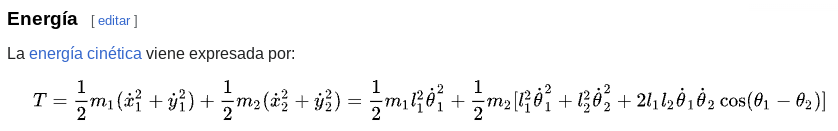

#4.
 Usando `SymPy`, determine la fórmula para las fuerzas generalizadas.

**Importante:** en este punto se hace uso de chat gpt, como una ayuda para identificar como es la escritura de los vectores unitarios en sympy; se obtiene lo siguiente: ```unit_vector_x = sp.Matrix([1, 0, 0])```

Comenzamos con la escritura de las fuerzas aplicadas para la masas 1 y 2.


In [50]:
def F1_a(m1, g):
  '''Recibe la masa del primer cuerpo y la aceleración de la gravedad.
  Retorna la fuerza aplicada sobre la masa 1.
  '''
  e_y = sp.Matrix([0, 1, 0])
  return -m1 * g * e_y

def F2_a(m2, g):
  '''Recibe la masa del segundo cuerpo y la aceleración de la gravedad.
  Retorna la fuerza aplicada sobre la masa 2.
  '''
  e_y = sp.Matrix([0, 1, 0])
  return -m2 * g * e_y

ec_F1_a = F1_a(m1, g)
ec_F2_a = F2_a(m2, g)

Ahora escribimos las fuerzas generalizadas, teniendo en cuenta que aparecerán 2; esto se debe a que hay una variable generalizada por cada variable generalizada.

Hacemos uso de chat gpt, para encontrar la forma correcta de hacer producto punto entre dos vectores usando sympy:  ```dot_product_sym = vec1.dot(vec2)```

Comenzamos definiendo las derivadas parciales que vamos a necesitar en medio del proceso:

In [51]:
#vectores unitarios
e_x = sp.Matrix([1, 0, 0])
e_y = sp.Matrix([0, 1, 0])
e_z = sp.Matrix([0, 0, 1])

#Para Q1
partial_x1_q1 = sp.diff(ec_x1, q1)
partial_y1_q1 = sp.diff(ec_y1, q1)
partial_z1_q1 = sp.diff(ec_z1, q1)
partial_r1_q1 = partial_x1_q1 * e_x + partial_y1_q1 * e_y + partial_z1_q1 * e_z

partial_x2_q1 = sp.diff(ec_x2, q1)
partial_y2_q1 = sp.diff(ec_y2, q1)
partial_z2_q1 = sp.diff(ec_z2, q1)
partial_r2_q1 = partial_x2_q1 * e_x + partial_y2_q1 * e_y + partial_z2_q1 * e_z

#Para Q2
partial_x1_q2 = sp.diff(ec_x1, q2)
partial_y1_q2 = sp.diff(ec_y1, q2)
partial_z1_q2 = sp.diff(ec_z1, q2)
partial_r1_q2 = partial_x1_q2 * e_x + partial_y1_q2 * e_y + partial_z1_q2 * e_z

partial_x2_q2 = sp.diff(ec_x2, q2)
partial_y2_q2 = sp.diff(ec_y2, q2)
partial_z2_q2 = sp.diff(ec_z2, q2)
partial_r2_q2 = partial_x2_q2 * e_x + partial_y2_q2 * e_y + partial_z2_q2 * e_z

Calculamos las fuerzas generalizadas

In [52]:
Q1 = ec_F1_a.dot(partial_r1_q1) + ec_F2_a.dot(partial_r2_q1)
Q2 = ec_F1_a.dot(partial_r1_q2) + ec_F2_a.dot(partial_r2_q2)

Imprimimos el resultado de Q1

In [53]:
sp.simplify(Q1)

g*l1*(-m1 - m2)*sin(q1(t))

Y el de Q2

In [54]:
sp.simplify(Q2)

-g*l2*m2*sin(q2(t))

#5.
 Usando los resultados en 3 y en 4, escriba las ecuaciones de movimiento del sistema a partir de las ecuaciones de Lagrange del Sistema. Es normal que las ecuaciones se escriban como la segunda derivada de cada variable generalizada como función de las primeras derivada de las variables generalizadas y las variables generalizadas en sí.  Es decir las ecuaciones deben tener la forma:

  $$
  \ddot q_j = f_j (\{q_j\}_M,\{\dot q_j\}_M,t)
  $$

La idea ahora es escribir las ecuaciones de lagrange del sistema, observando que por cada fuerza generalizada hay una ecuación de Lagrange

In [55]:
#primera ecuación

temp_der_partial_dq1 = energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2)[5]
temp_der_partial_dq2 = energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2)[6]
partial_T_q1 = energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2)[1]
partial_T_q2 = energia_y_derivadas(ec_x1, ec_x2, ec_y1, ec_y2, ec_z1, ec_z2)[2]

lagrange_1 = temp_der_partial_dq1 - partial_T_q1 - Q1
lagrange_2 = temp_der_partial_dq2 - partial_T_q2 - Q2

Como queremos resolver las ecuaciones ```lagrange_1``` y ```lagrange_2``` para $\frac{d^2q1}{dt^2}$ y $\frac{d^2q2}{dt^2}$ respectivamente, lo que hacemos es definir lo siguiente:

In [56]:
dq1 = sp.diff(q1, t)
dq2 = sp.diff(q2, t)
ddq1 = sp.diff(q1, t, t)
ddq2 = sp.diff(q2, t, t)

Resolvemos:

In [57]:
ec_dif_m1 = sp.solve(lagrange_1, ddq1)[0]
ec_dif_m2 = sp.solve(lagrange_2, ddq2)[0]

ddm1 = sp.latex(ec_dif_m1)
ddm2 = sp.latex(ec_dif_m2)

print(f"ddq1 = {ddm1}")
print(f"ddq2 = {ddm2}")

ddq1 = - \frac{g m_{1} \sin{\left(q_{1}{\left(t \right)} \right)} + g m_{2} \sin{\left(q_{1}{\left(t \right)} \right)} + l_{2} m_{2} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{2}{\left(t \right)}\right)^{2} + l_{2} m_{2} \cos{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} q_{2}{\left(t \right)}}{l_{1} \left(m_{1} + m_{2}\right)}
ddq2 = \frac{- g \sin{\left(q_{2}{\left(t \right)} \right)} + l_{1} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{1}{\left(t \right)}\right)^{2} - l_{1} \cos{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} q_{1}{\left(t \right)}}{l_{2}}


$$\frac{d^2q1}{dt^2} =  - \frac{g m_{1} \sin{\left(q_{1}{\left(t \right)} \right)} + g m_{2} \sin{\left(q_{1}{\left(t \right)} \right)} + l_{2} m_{2} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{2}{\left(t \right)}\right)^{2} + l_{2} m_{2} \cos{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} q_{2}{\left(t \right)}}{l_{1} \left(m_{1} + m_{2}\right)}
$$


$$\frac{d^2q2}{dt^2} = \frac{- g \sin{\left(q_{2}{\left(t \right)} \right)} + l_{1} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{1}{\left(t \right)}\right)^{2} - l_{1} \cos{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} q_{1}{\left(t \right)}}{l_{2}}$$


Observamos que estas ecuaciones se encuentran "acopladas", debido a que la primera tienen la presencia de la segunda y viceversa.
Entonces, resolver el problema de la forma que lo realizaríamos por ejemplo para el péndulo elástico no es una alternativa.

Como necesitamos que las ecuaciones queden de la forma:  $\ddot q_j = f_j (\{q_j\}_M,\{\dot q_j\}_M,t)$, entonces hacemos uso de Chat gpt para darnos una idea de cómo proceder.

Encontramos que lo que debemos hacer es escribir las ecuaciones recién encontradas usando ```sp.Eq```, y luego usar ```sp.solve``` para resolver el sistema de ecuaciones de forma simultánea.

```sp.solve``` recibe uan lista con las ecuaciones que queremos resolver, y otra lista con las incógnitas que queremos despejar o resolver.

Luego de realizar algunas pruebas, nos damos cuenta que al tomar los símbolos de las masas y de las longitudes de las cuerdas tal como se había definido previamente surgen problemas de compilación, por lo cual definimos los símbolos como letras mayúsculas

In [58]:
L1, L2, M1, M2, g = sp.symbols('L1 L2 M1 M2 g')

eq1 = sp.Eq(ddq1, - (g*M1*sp.sin(q1) + g*M2*sp.sin(q1) + L2*M2*sp.sin(q1 - q2)*dq2**2 + L2*M2*sp.cos(q1 - q2)*ddq2) / (L1*(M1 + M2)))
eq2 = sp.Eq(ddq2, (-g*sp.sin(q2) + L1*sp.sin(q1 - q2)*dq1**2 - L1*sp.cos(q1 - q2)*ddq1) / L2)

sol = sp.solve([eq1, eq2], (ddq1, ddq2))
ddq1_expr = sol[ddq1]
ddq2_expr = sol[ddq2]

ddm1_final = sp.latex(sp.simplify(ddq1_expr))
ddm2_final = sp.latex(sp.simplify(ddq2_expr))

#print(f"ddq1 = {ddm1_final}")
#print(f"ddq2 = {ddm2_final}")

$$\frac{d^2q1}{dt^2} = \frac{- \frac{L_{1} M_{2} \sin{\left(2 q_{1}{\left(t \right)} - 2 q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{1}{\left(t \right)}\right)^{2}}{2} - L_{2} M_{2} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{2}{\left(t \right)}\right)^{2} - M_{1} g \sin{\left(q_{1}{\left(t \right)} \right)} - \frac{M_{2} g \sin{\left(q_{1}{\left(t \right)} - 2 q_{2}{\left(t \right)} \right)}}{2} - \frac{M_{2} g \sin{\left(q_{1}{\left(t \right)} \right)}}{2}}{L_{1} \left(M_{1} - M_{2} \cos^{2}{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} + M_{2}\right)}
$$




$$\frac{d^2q2}{dt^2} =  \frac{L_{1} M_{1} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{1}{\left(t \right)}\right)^{2} + L_{1} M_{2} \sin{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{1}{\left(t \right)}\right)^{2} + \frac{L_{2} M_{2} \sin{\left(2 q_{1}{\left(t \right)} - 2 q_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} q_{2}{\left(t \right)}\right)^{2}}{2} + \frac{M_{1} g \sin{\left(2 q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)}}{2} - \frac{M_{1} g \sin{\left(q_{2}{\left(t \right)} \right)}}{2} + \frac{M_{2} g \sin{\left(2 q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)}}{2} - \frac{M_{2} g \sin{\left(q_{2}{\left(t \right)} \right)}}{2}}{L_{2} \left(M_{1} - M_{2} \cos^{2}{\left(q_{1}{\left(t \right)} - q_{2}{\left(t \right)} \right)} + M_{2}\right)}
$$

###Vamos a verificar lo que se acaba de realizar, con el ejemplo realizado en clase.


Declaramos los símbolos que vamos a necesitar

In [59]:
L, m , k = sp.symbols('L m k')

Definimos las funciones relacionadas con el problema

In [60]:
def x(L, q1, q2):
  return (L + q2) * sp.sin(q1)

def y(L, q1, q2):
  return - (L + q2) * sp.cos(q1)

def z():
  return 0

ec_x, ec_y, ec_z = x(L, q1, q2), y(L, q1, q2), z()

Función de energía cinética (T)

In [61]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[0])

0.5*m1*(L**2*Derivative(q1(t), t)**2 + 2*L*q2(t)*Derivative(q1(t), t)**2 + q2(t)**2*Derivative(q1(t), t)**2 + Derivative(q2(t), t)**2)

Derivada parcial de T con respecto a q1

In [62]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[1])

0

Derivada parcial de T con respecto a q2

In [63]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[2])

1.0*m1*(L + q2(t))*Derivative(q1(t), t)**2

Derivada parcial de T con respecto a la derivada temporal de q1

In [64]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[3])

1.0*m1*(L + q2(t))**2*Derivative(q1(t), t)

Derivada parcial de T con respecto a la derivada temporal de q1

In [65]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[4])

1.0*m1*Derivative(q2(t), t)

Derivada con respecto al tiempo de la derivada parcial de T con respecto a la derivada temporal de q1

In [66]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[5])

m1*(1.0*L**2*Derivative(q1(t), (t, 2)) + 2.0*L*q2(t)*Derivative(q1(t), (t, 2)) + 2.0*L*Derivative(q1(t), t)*Derivative(q2(t), t) + 1.0*q2(t)**2*Derivative(q1(t), (t, 2)) + 2.0*q2(t)*Derivative(q1(t), t)*Derivative(q2(t), t))

Derivada con respecto al tiempo de la derivada parcial de T con respecto a la derivada temporal de q2

In [67]:
sp.simplify(energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[6])

1.0*m1*Derivative(q2(t), (t, 2))

Hasta este punto, lo que hemos conseguido coincide con el desarrollo de clase

Veamos ahora la verificación, para la obtención de las fuerzas generalizadas

In [68]:
#vectores unitarios
e_x = sp.Matrix([1, 0, 0])
e_y = sp.Matrix([0, 1, 0])
e_z = sp.Matrix([0, 0, 1])

def F_a(q1, q2, m1, g):
  '''
  '''
  return -k * q2 * sp.sin(q1) * e_x + (-m1*g + k*q2*sp.cos(q1)) * e_y

ec_F_a = F_a(q1, q2, m1, g)

#Para Q1
partial_x_q1 = sp.diff(ec_x, q1)
partial_y_q1 = sp.diff(ec_y, q1)
partial_z_q1 = sp.diff(ec_z, q1)
partial_r_q1 = partial_x_q1 * e_x + partial_y_q1 * e_y + partial_z_q1 * e_z

#Para Q2
partial_x_q2 = sp.diff(ec_x, q2)
partial_y_q2 = sp.diff(ec_y, q2)
partial_z_q2 = sp.diff(ec_z, q2)
partial_r_q2 = partial_x_q2 * e_x + partial_y_q2 * e_y + partial_z_q2 * e_z

Q1 = ec_F_a.dot(partial_r_q1)
Q2 = ec_F_a.dot(partial_r_q2)

temp_der_partial_dq1 = energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[5]
temp_der_partial_dq2 = energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[6]
partial_T_q1 = energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[1]
partial_T_q2 = energia_y_derivadas(ec_x, 0, ec_y, 0, ec_z, 0)[2]

lagrange_1 = temp_der_partial_dq1 - partial_T_q1 - Q1
lagrange_2 = temp_der_partial_dq2 - partial_T_q2 - Q2

dq1 = sp.diff(q1, t)
dq2 = sp.diff(q2, t)
ddq1 = sp.diff(q1, t, t)
ddq2 = sp.diff(q2, t, t)

ec_dif_1 = sp.solve(lagrange_1, ddq1)[0]
ec_dif_2 = sp.solve(lagrange_2, ddq2)[0]

Imprimimos el valor de q1 dos puntos

In [69]:
sp.simplify(ec_dif_1)

(-g*sin(q1(t)) - 2.0*Derivative(q1(t), t)*Derivative(q2(t), t))/(L + q2(t))

iprimimos el valor de q2 dos puntos

In [70]:
sp.simplify(ec_dif_2)

L*Derivative(q1(t), t)**2 + g*cos(q1(t)) - k*q2(t)/m1 + q2(t)*Derivative(q1(t), t)**2

Observamos que con el mismo procedimiento que hemos desarollado para el péndulo doble hemos podido replicar las ecuaciones de movimiento que aprendimos en clase para el caso del péndulo elástico

#6.
 Programe las ecuaciones de movimiento e intégrelas numéricamente para condiciones iniciales apropiadas. Haga una animación de la solución.

Ahora, vamos a proceder con el uso de odeint para resolver las ecuaciones, pero primero debemos convertirlas a funciones numércias de numpy

In [71]:
ddq1_func = sp.lambdify((q1, q2, dq1, dq2, L1, L2, M1, M2, g), ddq1_expr, 'numpy')
ddq2_func = sp.lambdify((q1, q2, dq1, dq2, L1, L2, M1, M2, g), ddq2_expr, 'numpy')


def ecuaciones_pendulo_doble(Ys, t, L1, L2, M1, M2):
  '''recibe un arreglo o lista con las condiciones iniciales,
  el tiempo en el cual desea obtener la solución, las longitudes
  de ambas cuerdas, y las masas de los dos cuerpos.
  Retorna un sistema de ecuaciones diferenciales, que van a permitir que
  el problema sea resuelto usando odeint
  '''
  g = 9.81
  q1, q2, dq1, dq2 = Ys

  #ecuaciones diferenciales
  dq1dt = dq1
  dq2dt = dq2
  ddq1dt = ddq1_func(q1, q2, dq1, dq2, L1, L2, M1, M2, g)
  ddq2dt = ddq2_func(q1, q2, dq1, dq2, L1, L2, M1, M2, g)

  return [dq1dt, dq2dt, ddq1dt, ddq2dt]

ts = np.linspace(0, 10, 200)
Y0s = [np.pi/3, np.pi/2, 0, 0]

L1 = 1
L2 = 1
M1 = 3
M2 = 4
solucion = odeint(ecuaciones_pendulo_doble, Y0s, ts, args =(L1, L2, M1, M2))

thetas_1 = solucion[:,0]
thetas_2 = solucion[:,1]

Como ya tenemos las soluciones para las dos variables generalizadas, vamos a graficar:

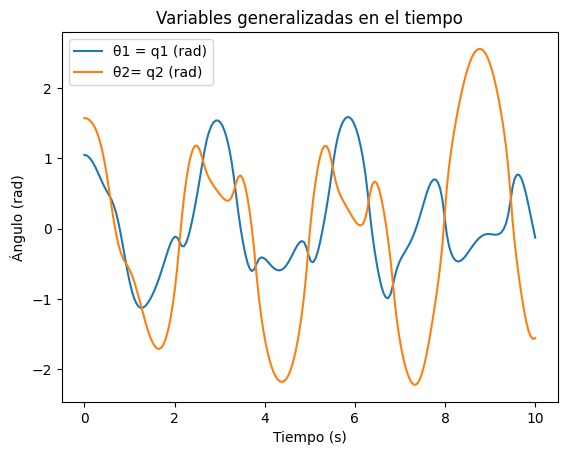

In [72]:
plt.plot(ts, thetas_1, label='θ1 = q1 (rad)')
plt.plot(ts, thetas_2, label='θ2= q2 (rad)')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Variables generalizadas en el tiempo')
plt.show()

Una vez tenemos la evolución de las variables generalizadas, nos devolvemos a las coordenadas cartesianas para realizar la animación:

In [73]:
#masa_1
xs1 = L1 * np.sin(thetas_1)
ys1 = -L1 * np.cos(thetas_1)

#masa_2
xs2 = L1 * np.sin(thetas_1) + L2 * np.sin(thetas_2)
ys2 = -L1 * np.cos(thetas_1) - L2 * np.cos(thetas_2)

Escribimos el código para realizar la animación

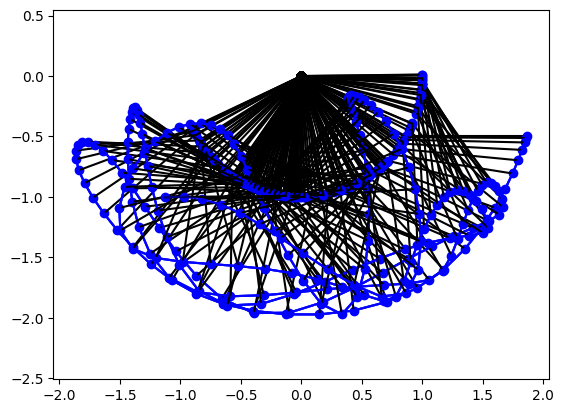

In [74]:
fig,ax = plt.subplots(1,1)
camara = Camera(fig)

for i,t in enumerate(ts):
  #masas 1 y 2
  ax.plot(xs1[i],ys1[i],'bo')
  ax.plot(xs2[i],ys2[i],'bo')

  #origen
  ax.plot(0,0,'ko')

  #líneas que representan las cuerdas
  ax.plot([0,xs1[i]],[0,ys1[i]],'k-')
  ax.plot([xs1[i], xs2[i]],[ys1[i], ys2[i]],'k-')

  #rastros
  if i < 6:
    ax.plot(xs2[:i+1], ys2[:i+1], 'b-', alpha = 0.5)
  else:
    ax.plot(xs2[i-6:i+1], ys2[i-6:i+1], 'b-', alpha = 0.5)

  camara.snap()

ax.axis('equal');

In [75]:
anim = camara.animate()
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

##Ahora, como complemento veremos una animación de lo que sucede cuando se alteran un poco las condiciones iniciales

Recopilamos el código que recién se desarorolló y explicó, dónde lo único que se modifica son las condiciones iniciales

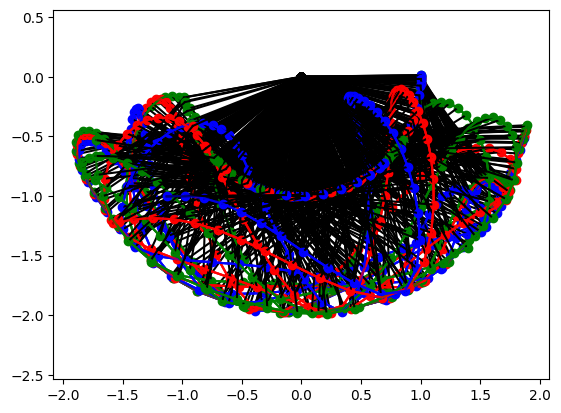

In [76]:
#condiciones iniciales
Y0s_1 = [np.pi/3, np.pi/2, 0, 0]
Y0s_2 = [np.pi/3 + 0.03, np.pi/2 + 0.03, 0, 0]
Y0s_3 = [np.pi/3 + 0.05, np.pi/2 + 0.05, 0, 0]

#soluciones
solucion_1 = odeint(ecuaciones_pendulo_doble, Y0s_1, ts, args =(L1, L2, M1, M2))
solucion_2 = odeint(ecuaciones_pendulo_doble, Y0s_2, ts, args =(L1, L2, M1, M2))
solucion_3 = odeint(ecuaciones_pendulo_doble, Y0s_3, ts, args =(L1, L2, M1, M2))

thetas_1_1, thetas_2_1 = solucion_1[:,0], solucion_1[:,1]
thetas_1_2, thetas_2_2 = solucion_2[:,0], solucion_2[:,1]
thetas_1_3, thetas_2_3 = solucion_3[:,0], solucion_3[:,1]

#coordenadas masas 1 y 2 en cada caso
xs1_1, ys1_1 = L1 * np.sin(thetas_1_1), -L1 * np.cos(thetas_1_1)
xs2_1, ys2_1 = L1 * np.sin(thetas_1_1) + L2 * np.sin(thetas_2_1), -L1 * np.cos(thetas_1_1) - L2 * np.cos(thetas_2_1)

xs1_2, ys1_2 = L1 * np.sin(thetas_1_2), -L1 * np.cos(thetas_1_2)
xs2_2, ys2_2 = L1 * np.sin(thetas_1_2) + L2 * np.sin(thetas_2_2), -L1 * np.cos(thetas_1_2) - L2 * np.cos(thetas_2_2)

xs1_3, ys1_3 = L1 * np.sin(thetas_1_3), -L1 * np.cos(thetas_1_3)
xs2_3, ys2_3 = L1 * np.sin(thetas_1_3) + L2 * np.sin(thetas_2_3), -L1 * np.cos(thetas_1_3) - L2 * np.cos(thetas_2_3)

#animacion
fig,ax = plt.subplots(1,1)
camara = Camera(fig)

for i,t in enumerate(ts):
  #masas 1 y 2
  ax.plot(xs1_1[i],ys1_1[i],'bo')
  ax.plot(xs2_1[i],ys2_1[i],'bo')

  ax.plot(xs1_2[i],ys1_2[i],'ro')
  ax.plot(xs2_2[i],ys2_2[i],'ro')

  ax.plot(xs1_3[i],ys1_3[i],'go')
  ax.plot(xs2_3[i],ys2_3[i],'go')

  #origen
  ax.plot(0,0,'ko')

  #líneas que representan las cuerdas
  ax.plot([0,xs1_1[i]],[0,ys1_1[i]],'k-')
  ax.plot([xs1_1[i], xs2_1[i]],[ys1_1[i], ys2_1[i]],'k-')

  ax.plot([0,xs1_2[i]],[0,ys1_2[i]],'k-')
  ax.plot([xs1_2[i], xs2_2[i]],[ys1_2[i], ys2_2[i]],'k-')

  ax.plot([0,xs1_3[i]],[0,ys1_3[i]],'k-')
  ax.plot([xs1_3[i], xs2_3[i]],[ys1_3[i], ys2_3[i]],'k-')

  #rastros
  if i < 6:
    ax.plot(xs2_1[:i+1], ys2_1[:i+1], 'b-', alpha = 0.5)
    ax.plot(xs2_2[:i+1], ys2_2[:i+1], 'r-', alpha = 0.5)
    ax.plot(xs2_3[:i+1], ys2_3[:i+1], 'g-', alpha = 0.5)
  else:
    ax.plot(xs2_1[i-6:i+1], ys2_1[i-6:i+1], 'b-', alpha = 0.5)
    ax.plot(xs2_2[i-6:i+1], ys2_2[i-6:i+1], 'r-', alpha = 0.5)
    ax.plot(xs2_3[i-6:i+1], ys2_3[i-6:i+1], 'g-', alpha = 0.5)

  camara.snap()

ax.axis('equal');

Generamos la animación

In [77]:
anim = camara.animate()
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

Observamos que cuando se varían un poco las condiciones iniciales asociadas a las coordendas generaizadas empleadas (ambos ángulos), se alcanza un tiempo en el cual pareciera que las condciones iniciales fuesen completamente diferentes.